In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize']= (20.0,10.0)

#Reading data
data= pd.read_csv('/root/Projects/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [8]:
data.tail()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [4]:
data.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [5]:
#collecting X & Y
X=data['Head Size(cm^3)'].values
Y= data['Brain Weight(grams)'].values

In [6]:
#Mean of X & Y
mean_x=np.mean(X)
mean_y=np.mean(Y)

#TOTAL NUMBER OF VALUE
m=len(X)

#Using the formula to calculate b1 & b0 i.e m & c in y=mx+c
number =0
denom= 0
for i in range(m):
    number += (X[i] -mean_x)* (Y[i] - mean_y)
    denom += (X[i] - mean_x)**2
b1=number/denom
b0=mean_y - (b1*mean_x)

#Print Coefficients
print(b1,b0)

0.26342933948939945 325.57342104944223


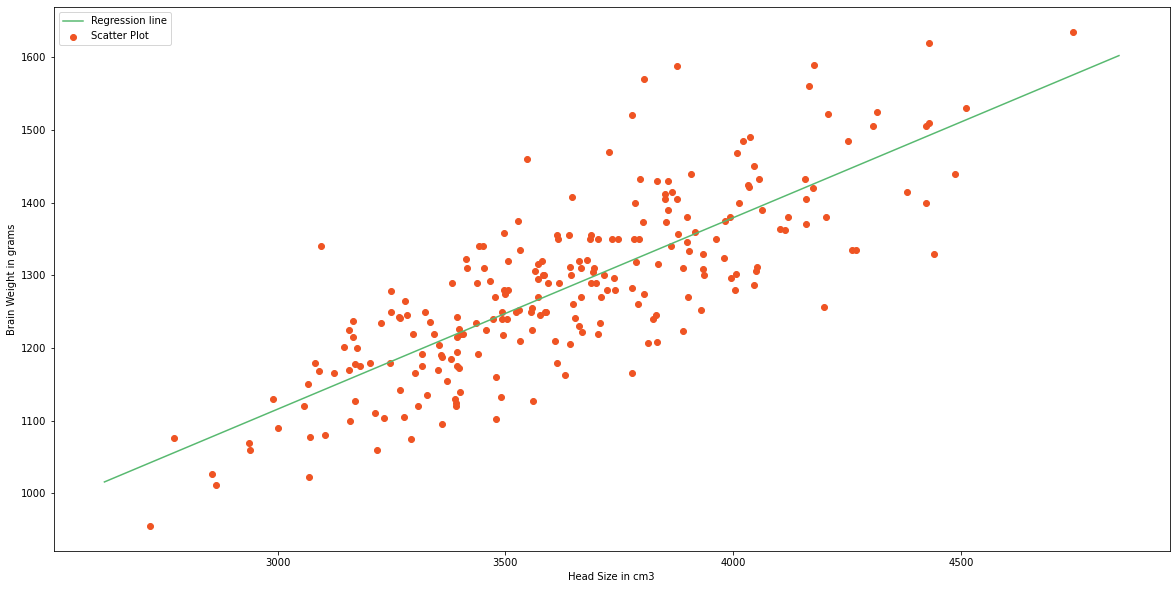

In [9]:
#Plotting value and Regression line

max_x=np.max(X)+100
min_x=np.min(X)-100

#Calcluting line value x and y
x=np.linspace(min_x,max_x,1000)
y=b0+b1*x

#Ploting Line
plt.plot(x,y, color='#58b970', label='Regression line')
#plotting scatter points
plt.scatter(X,Y,c='#ef5423',label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [11]:
#Goodness of fit/R sq. method
ss_t=0
ss_r=0
for i in range(m):
    y_pred= b0+b1*X[i]
    ss_t += (Y[i]- mean_y)**2
    ss_r += (y_pred- mean_y)**2
r2=(ss_r/ss_t)
print(r2)

0.6393117199570001


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#Cannot use Rank q matrix in scikit Learn
X=X.reshape((m,1))

#Creating MOdel
reg= LinearRegression()
#Fitting training data
reg= reg.fit(X,Y)
#Y prediction
Y_pred = reg.predict(X)

#calculating RMSE and R2 score
mse= mean_squared_error(Y,Y_pred)
rmse = np.sqrt(mse)
r2_score= reg.score(X,Y)


print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957
